# Covid-19 Prediction from Lung CT

This notebook utilizes a trained **classifier** to recognize **Covid-19** positive patients from their **CT lungs** scans in order to support the physician’s decision process with a quantitative approach.

In [1]:
from esmlib import *

## Select an exam folder

With the following code you can select the folder that contains the **.dcm** file images.

In [2]:
path_exam = askdirectory()

In [ ]:
# Negative 
# path_exam = r"C:\Users\matti\Desktop\CT_Negative\manifest-1612365584013\MIDRC-RICORD-1B\MIDRC-RICORD-1B-419639-000425\05-28-2002-CT CHEST WITHOUT CONTRAST-88172\2.000000-ROUTINE CHEST NON-CON-50407"

# Positive
# path_exam = r"C:\Users\matti\Desktop\CT_Positive\manifest-1608266677008\MIDRC-RICORD-1A\MIDRC-RICORD-1A-419639-000082\08-02-2002-CT CHEST WITHOUT CONTRAST-04614\2.000000-ROUTINE CHEST NON-CON-97100"
# path_exam = r"C:\Users\matti\Desktop\CT_Positive\manifest-1608266677008\MIDRC-RICORD-1A\MIDRC-RICORD-1A-SITE2-000019\02-04-2007-28429\3.000000-33766"

Read some interesting **metadata** relative to the patient exam:

In [3]:
get_metadata(path_exam)

PatientID: MIDRC-RICORD-1A-419639-000082
	Sex: F
	Age: 85

Study Description: CT CHEST WITHOUT CONTRAST
	Exam Modality: CT
	Number of scans: 255
	Image size 512x512
	Patient Position: HFS
	Slice Thickness: 1.250000
	Space between slices: 1.25


## Interactive Slider for visualizing the exam folder

In [4]:
def dicom_animation(x):
    plt.figure(1, figsize=(12,10))
    plt.imshow(m[x], cmap=plt.cm.gray)
    return x

In [5]:
files = sorted(os.listdir(path_exam))
m = np.zeros((len(files), 410, 450))
for n in range(0,len(files)):
    pathtemp = path_exam + "\\" + files[n]
    img = load_and_preprocess_dcm(pathtemp)
    m[n, : , : ] = img

Move the slider to scroll through the images

In [6]:
interact(dicom_animation, x=(0, len(m)-1))

interactive(children=(IntSlider(value=127, description='x', max=254), Output()), _dom_classes=('widget-interac…

<function __main__.dicom_animation(x)>

## Automatic selection of three scans

In [3]:
lista, idx_sel = select_paths(path_exam)

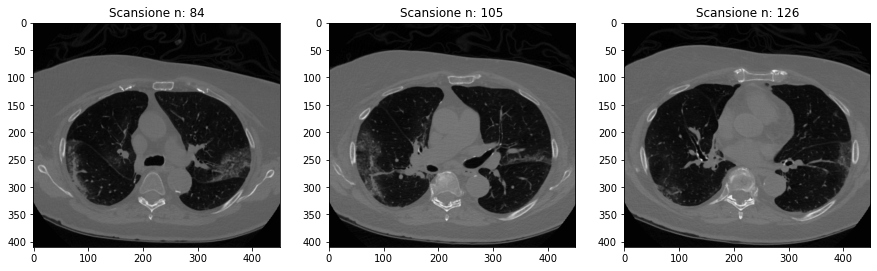

In [4]:
lista_img = select_and_show_3(lista, idx_sel)

### If the selected scans are not good enough, you can specify in the following code the number of scans to select

In [9]:
a = input("Insert the index number of the first scan: ")

Insert the index number of the first scan: 78


In [ ]:
b = input("Insert the index number of the second scan: ")

In [ ]:
c = input("Insert the index number of the third scan: ")

In [ ]:
idx_sel = [int(a), int(b), int(c)]
lista_img = select_and_show_3(lista, idx_sel)

## Get the mask of the three images

In [5]:
mask_list = []
for img in lista_img:
    first_mask = mask_kmeans(img)
    final_mask = fill_mask(first_mask)
    mask_list.append(final_mask)

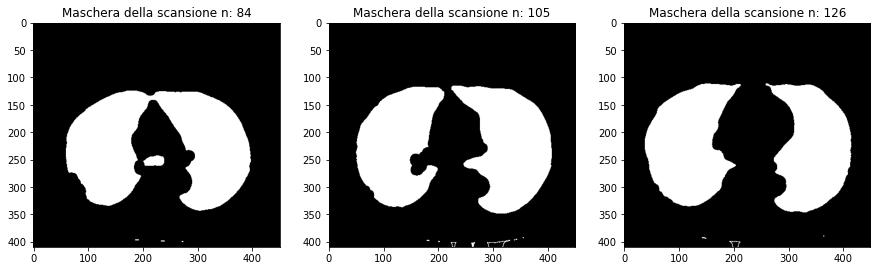

In [6]:
show_3_mask(mask_list, idx_sel)

### If the selected mask are not good enough, you can specify in the following code the number of mask to modify

In [12]:
n_mask = input("Insert the index number of the scan you want to replace: ")

Insert the index number of the scan you want to replace: 2


With the following code, you can *draw manually* the lung mask (ROI)

In [13]:
%matplotlib qt 
roi1, mask = manually_roi_select(lista_img, mask_list, n_mask)

Show the manually selected mask

In [ ]:
%matplotlib inline 
show_roi_selected(roi1, mask, n_mask, lista_img)

#### If you want to modify another mask, just repeat the process

Finally, the mask considered are:

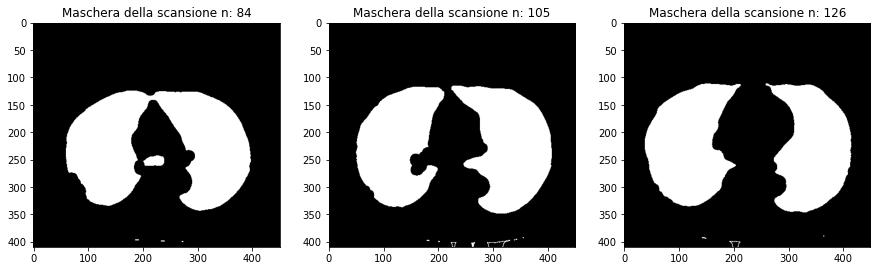

In [11]:
show_3_mask(mask_list, idx_sel)

## Features extraction

We extract the **Haralick Features** from the equalized and filtered masked images selected

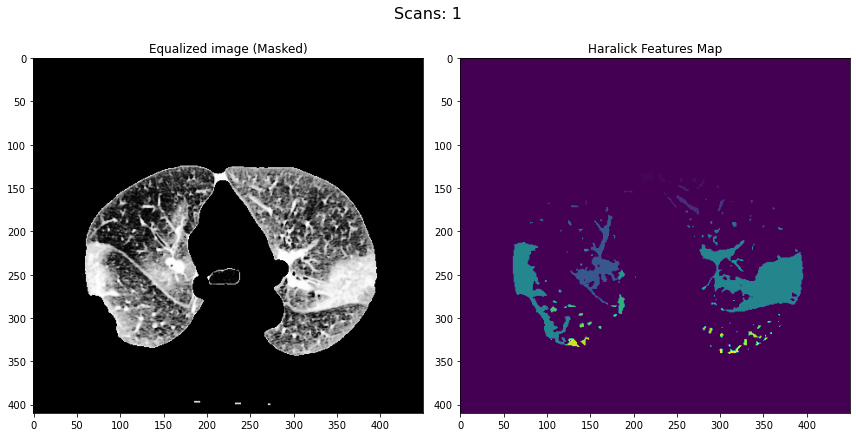

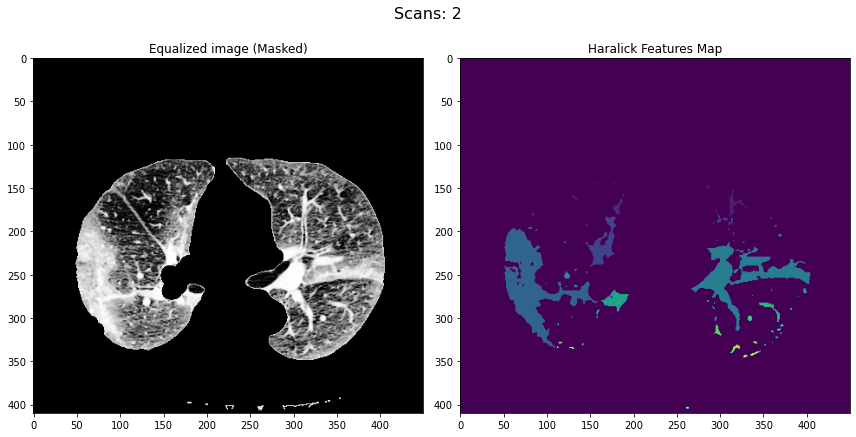

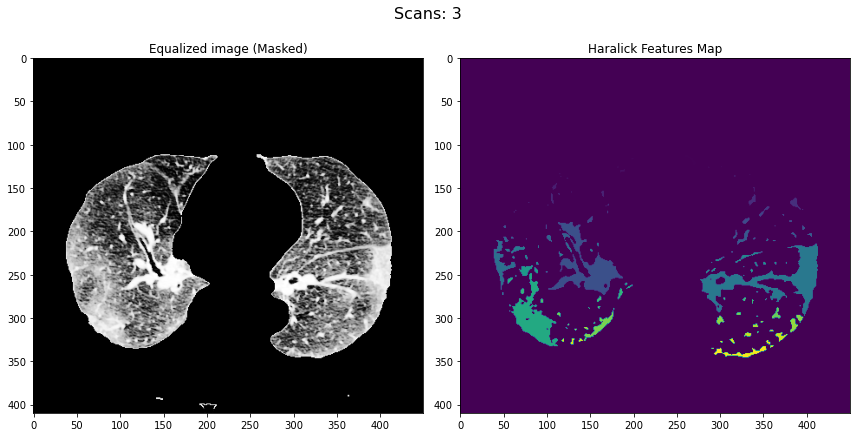

In [7]:
feat = features_and_plot(lista_img, mask_list, printing=True)

## Covid-19 Prediction

Run the classifier on the extracted features and get the prediction for the patient

In [8]:
covid_predict(feat)

The patient is positive to Covid-19 with a confidence of 66.86%
